# 1 Introduction

After a long and invigorating day, where I had the privilege of addressing an eager audience at the International Association for Neuroscience in Egypt, a barrage of questions awaited me from over a hundred college and high school students. Among these queries, one resounded with particular intensity: "How can I be more productive?" It was a question that struck at the very heart of ambition and achievement.

For those who follow my channel and seek my counsel, I have consistently advocated a simple yet transformative practice: the act of setting goals. I've always stressed the importance of knowing precisely what you intend to accomplish each day, even before you lay down to rest. However, I confess that I, too, have experienced moments when my well-intentioned goals remained unfulfilled. The culprit? I had unwittingly succumbed to the allure of non-SMART goals—those vague, nebulous aspirations that can leave us feeling unfulfilled.

It was during this reflective journey that I stumbled upon Parkinson's Law, a notion so elegantly simple in its articulation yet profound in its implications. Parkinson's Law boldly declares that work expands to fill the time allocated for its completion. And therein lies the crux of our conundrum.

Consider this: The disparity between scrawling "do PCW" and meticulously noting "complete pre-class work for CS156 from 7 to 10 PM" is cavernous. It's a realization that I have come to embrace, one that has reshaped my approach to productivity and time management. I've personally undergone a profound transformation in my productivity since I began implementing SMART goals into my daily life. This realization has been so impactful that it has inspired me to undertake this assignment. My aim is to provide students with the tools to assess the intelligence of their goals—whether they truly qualify as SMART or not.

By embarking on this journey, you'll have the opportunity to scrutinize your own aspirations and objectives, evaluating them against the rigorous criteria of SMARTness. And, in doing so, you'll gain the power to make informed decisions about whether to modify your existing goals or embark on the exciting journey of rewriting them entirely. It's a journey that promises not just greater efficiency but also heightened productivity—a path towards achieving the ambitious dreams you've set for yourself. So, let's dive into the world of SMART goals and unleash the full potential of your aspirations!


In this notebook, we endeavor to utilize machine learning to determine how well various statements align with the principles of SMART goals. Our dataset comprises textual statements, and our challenge lies in classifying them based on the five criteria of SMART. Given the subtleties and nuances in language, this task presents intriguing complexities.

To tackle this, we will be experimenting with multiple state-of-the-art Natural Language Processing (NLP) models, including:

1. **BERT (Bidirectional Encoder Representations from Transformers)**: An NLP model from Google that revolutionized the landscape by introducing a bidirectional training approach. We'll leverage BERT to deeply understand the contextual meaning of words in our goal statements.
   
2. **RoBERTa (A Robustly Optimized BERT Pretraining Approach)**: An optimized version of BERT, introduced by Facebook AI, promising more robust performance due to its refined training methodology.
   
3. **XLNet (Generalized Autoregressive Pretraining for Language Understanding)**: An advanced model from Google/CMU, which combines the strengths of BERT with permutation-based training, aiming to capture a comprehensive contextual understanding.

Our primary objective is to assess each model's performance in terms of its ability to accurately classify statements based on the SMART criteria. Through this expedition, we aim to not only determine the best model for our task but also shed light on the broader potential of machine learning in enhancing productivity and goal-setting practices in real-world scenarios.

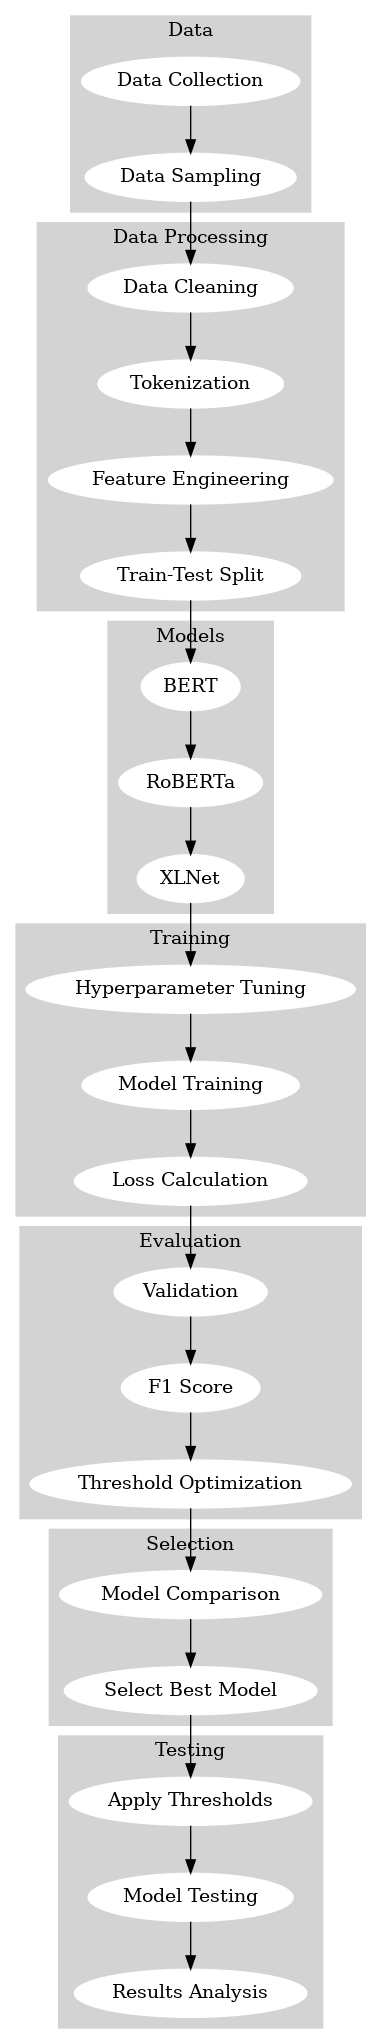

# 2. Explain the Data

## 2.1 What is included:

The dataset encompasses a total of 200 data points, each representing a personal goal I've set over time. Each goal has a description and is evaluated against the S.M.A.R.T criteria. The five criteria columns - Specific, Measurable, Achievable, Relevant, and Time-bound - have binary values indicating whether the goal aligns with that particular criterion.

## 2.2 How it was obtained:

All goals were sourced from my personal repository in Notion, where I've been recording my aspirations and objectives over time. Each goal was meticulously documented with a timestamp to indicate its inception. Subsequently, I evaluated every single goal against the S.M.A.R.T criteria to determine its clarity, feasibility, and relevance. This process was instrumental in retrospectively refining and understanding my objectives, as well as in providing insights into the structure and attainability of my aspirations.

### Importing necessary libraries


In [ ]:
!pip install sentencepiece
!pip install transformers
import pandas as pd
import nltk
from nltk.corpus import wordnet
from random import choice, random
import numpy as np
from multiprocessing import Pool, cpu_count
from transformers import (
    BertTokenizer, BertForSequenceClassification, AdamW,
    RobertaTokenizer, RobertaForSequenceClassification, RobertaConfig,
    XLNetTokenizer, XLNetForSequenceClassification, XLNetConfig,
    get_linear_schedule_with_warmup,
)
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.2 MB/s eta 0:00:00


###  Data Loading

The initial step in our data pipeline is loading the text data from my personal goals dataset, which is stored in a pandas DataFrame. This DataFrame, aptly named `data`, contains 6 main columns: `Goals` and the five S.M.A.R.T criteria (Specific, Measurable, Achievable, Relevant, Time-bound). Each row in the `Goals` column represents a personal goal, and the corresponding rows in the criteria columns are binary labels, indicating whether the goal satisfies that particular criterion by saying Yes or No.



In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_excel("/content/sample_data/Dataset.xlsx")
data.head()
# Assuming you have a DataFrame 'df'
data_types = data.dtypes
print(data_types)


Goals         object
Specific      object
Measurable    object
Achievable    object
Relevant      object
Time-bound    object
dtype: object


## Data Cleaning and Splitting

Once our dataset has been loaded, the next crucial phase in our pipeline is data cleaning and preparing the dataset for model training and validation.
### Data Cleaning:

To ensure that our machine learning models can understand and learn from our dataset effectively, we must first convert textual labels into a numerical format. This transformation simplifies the modeling process, as numerical inputs are more straightforward for models to interpret.

**Function: `convert_to_numeric`**
- This function serves to convert textual labels "Yes" and "No" to numeric values 1 and 0, respectively.
- The conversion is case-insensitive, meaning it can handle "YES", "yes", "YeS", etc., seamlessly.
- If the input value is neither "Yes" nor "No", the function returns the original value.

Using the `applymap` method of pandas, we apply this conversion function to our specified columns: 'Specific', 'Measurable', 'Achievable', 'Relevant', and 'Time-bound'. This step ensures that these columns now contain only numeric data, which is essential for our subsequent modeling tasks.

### Data Splitting:

Once our data is cleaned, the next task is to split it into training and validation sets. This division allows us to train our models on one subset of the data (training set) and validate its performance on another unseen subset (validation set).

**Function: `train_test_split` from `sklearn`**
- This function helps in splitting our dataset.
- We allocate 80% of our data for training and the remaining 20% for validation.
- The `random_state` parameter ensures reproducibility. If we were to split the dataset multiple times with the same random_state, we'd get the same training and validation sets each time.

### Data Verification:

After these processing steps, it's always a good practice to verify if the transformations have been applied correctly.

- We first check the data types of our training set using the `dtypes` attribute. This step ensures that our specified columns are indeed of numeric type after the conversion.
- Further, we examine the unique values in the 'Measurable' column. This step is a quick way to ensure that our conversion function has worked as expected, and there are no stray textual labels left.

By the end of this phase, we have a cleaned dataset, split into training and validation sets, ready to be fed into our deep learning models.


In [ ]:
# Define a function to convert 'Yes' and 'No' to 1 and 0 (case-insensitive)
def convert_to_numeric(value):
    if isinstance(value, str):  # Check if the value is a string
        value_lower = value.lower()
        if value_lower == 'yes':
            return 1
        elif value_lower == 'no':
            return 0
    return value  # Return the original value if it's not 'Yes' or 'No' in any case

# Apply the conversion function to the specified columns
data[['Specific', 'Measurable', 'Achievable', 'Relevant', 'Time-bound']] = data[['Specific', 'Measurable', 'Achievable', 'Relevant', 'Time-bound']].applymap(convert_to_numeric)

# Split the dataset into training and validation sets
train, val = train_test_split(data, test_size=0.2, random_state=42)

# Check data types
train_typ = train.dtypes
print(train_typ)

# Check unique values in the 'Measurable' column
unique_values = data['Measurable'].unique()
print(unique_values)


Goals         object
Specific       int64
Measurable     int64
Achievable     int64
Relevant       int64
Time-bound     int64
dtype: object
[0 1]


## 5. Data Augmentation using Synonym Replacement

Data augmentation is a technique used to artificially expand the size of our training dataset. By introducing slight variations in our existing data, we can create a more robust dataset, enhancing the model's generalization ability. In our case, we augment our textual data using synonym replacement.

### 5.1 Synonym Replacement:

The primary idea behind synonym replacement is to identify and replace words in our goals with their synonyms, thereby creating slightly different but semantically similar sentences.

**Function: `synonym_replacement`**
- Takes a list of words and the number of replacements as input.
- It avoids replacing certain determiners like 'a', 'an', and 'the'.
- For each word in the sentence, it attempts to replace it with a synonym.

**Function: `get_synonyms`**
- Given a word, this function fetches its synonyms using the WordNet lexical database.
- It ensures that the synonyms are in a clean, usable format for our tasks.

**Function: `augment_sentence`**
- This function orchestrates the entire process for a single sentence. It tokenizes the sentence, performs synonym replacement, and then reconstructs the sentence.

### 5.2 Parallel Processing:

Considering the potentially large size of our dataset, performing synonym replacement for each sentence can be computationally intensive and time-consuming. To expedite this process, we employ parallel processing.

**Function: `parallel_augment`**
- It distributes the dataset across multiple CPU cores for faster processing.
- Each core works on a chunk of data independently.

**Function: `worker`**
- It acts as a helper function for parallel processing. Each worker (or CPU core) uses this function to perform data augmentation on its chunk of data.

### 5.3 Augmenting the Dataset:

With our functions in place, we proceed to augment our training data:

- We decide on the number of replacements per sentence, which in our case is set to 1.
- We use all available CPU cores on the machine for parallel processing.
- The `parallel_augment` function is then called to perform data augmentation in parallel.
- The augmented data retains the same structure as our original training data, but the 'Goals' column contains the augmented sentences.

By the end of this phase, we have successfully augmented our training dataset, ensuring our model has a richer set of examples to learn from.


In [ ]:
nltk.download('wordnet')

def synonym_replacement(words, num_replacements=1):
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in ['a', 'an', 'the']]))

    num_replaced = 0
    replaced_words = set()

    while num_replaced < num_replacements and random_word_list:
        random_word = choice(random_word_list)

        # Limit the number of replacements for the same word to avoid excessive loops
        if random_word not in replaced_words:
            synonyms = get_synonyms(random_word)

            if len(synonyms) >= 1:
                synonym = choice(synonyms)
                new_words = [synonym if word == random_word else word for word in new_words]
                replaced_words.add(random_word)
                num_replaced += 1

        random_word_list.remove(random_word)

    return new_words

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def augment_sentence(sentence, num_replacements=1):
    words = sentence.split(' ')
    augmented_words = synonym_replacement(words, num_replacements)
    return ' '.join(augmented_words)

def parallel_augment(data, num_processes, num_replacements=1):
    # Split the data into chunks for each process
    data_split = np.array_split(data, num_processes)

    # Create a Pool of processes
    pool = Pool(processes=num_processes)

    # Use map to distribute the data chunks across the processes
    data_augmented = pd.concat(pool.map(worker, [(chunk, num_replacements) for chunk in data_split]))

    # Close the pool and wait for all processes to finish
    pool.close()
    pool.join()

    return data_augmented

def worker(data_chunk_and_replacements):
    data_chunk, num_replacements = data_chunk_and_replacements
    return data_chunk['Goals'].apply(lambda x: augment_sentence(x, num_replacements))

# Number of CPU cores on the machine
num_processes = cpu_count()
# Number of replacements per sentence
num_replacements = 1

# Augment the training data in parallel
augmented_data = train.copy()
augmented_data['Goals'] = parallel_augment(train, num_processes, num_replacements)

# Display the first few rows of the augmented data
augmented_data.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,Goals,Specific,Measurable,Achievable,Relevant,Time-bound
5,perfect 2 chapters of the history book every m...,1,1,1,1,0
135,see something new.,0,0,1,1,0
122,capstone inquiry,0,0,0,1,0
167,Have information technology all.,0,0,0,0,0
85,Engage inward DIY projects at home,1,1,1,1,1


## 6 Additional Data Augmentation Techniques

To further enrich our dataset and introduce more variability, we implement additional data augmentation techniques. These techniques can help in making the model more robust and prevent overfitting by diversifying the training data.

### 6.1 Random Insertion:

One method we use is to randomly select a word from the sentence and insert it at a random position within the same sentence. This can sometimes change the emphasis or slightly modify the meaning of the sentence but still remains relevant.

**Function: `random_insertion`**
- Accepts a list of words from a sentence and the number of insertions to be made.
- Calls the `add_word` function to insert words into random positions.

**Function: `add_word`**
- Given a list of words, it randomly selects a word and inserts it at a random position in the list.

### 6.2 Sentence Shuffling:

Another augmentation technique we use is to shuffle the order of words in a sentence. This can change the structure of the sentence while keeping the same set of words, thus generating a new variation.

**Function: `shuffle_sentence`**
- Accepts a sentence, shuffles its words, and then returns the shuffled sentence.

### 6.3 Applying Augmentation:

To combine all the augmentation techniques and apply them to our dataset, we define the `augment_data` function.

**Function: `augment_data`**
- Given a sentence, it:
  1. Applies synonym replacement.
  2. Performs random word insertion.
  3. Shuffles the words in the sentence.
- The augmented sentence is then returned.

Finally, we apply this `augment_data` function to the 'Goals' column of our dataset. After this step, each goal in our dataset has been augmented using all the techniques discussed, ensuring a comprehensive and diverse training set.



In [ ]:
import random
def random_insertion(words, num_insertions=1):
    """
    Insert random words from the same sentence into the sentence.
    """
    new_words = words.copy()
    for _ in range(num_insertions):
        add_word(new_words)
    return new_words

def add_word(words):
    """
    Add a word from the sentence to a random position.
    """
    if len(words) == 0:
        return
    word = choice(words)
    position = choice(range(len(words)))
    words.insert(position, word)

def shuffle_sentence(sentence):
    """
    Shuffle words in a sentence.
    """
    words = sentence.split(' ')
    random.shuffle(words)
    return ' '.join(words)

# Apply all augmentation techniques
def augment_data(sentence):
    words = sentence.split(' ')
    if len(words) > 1:
        # Apply synonym replacement
        sentence = ' '.join(synonym_replacement(words))
        # Apply random insertion
        sentence = ' '.join(random_insertion(sentence.split(' ')))
        # Apply sentence shuffling
        sentence = shuffle_sentence(sentence)
    return sentence

augmented_data['Goals'] = augmented_data['Goals'].apply(lambda x: augment_data(x))
augmented_data.head()


,Goals,Specific,Measurable,Achievable,Relevant,Time-bound
5,2 month the history book chapter chapter perfe...,1,1,1,1,0
135,witness new. something witness,0,0,1,1,0
122,capstone research research,0,0,0,1,0
167,all. selective technology information Have all.,0,0,0,0,0
85,Engage inward home protrude at at DIY,1,1,1,1,1


## 7. Model Initialization and Tokenization: BERT

### 7.1 Installation of Dependencies

Before diving into model initialization and data tokenization, it's crucial to ensure that the necessary Python libraries are installed. The `transformers` library, developed by Hugging Face, provides easy access to various transformer-based models, including BERT.

```python
!pip install transformers


###7.2 Initializing the Tokenizer
To preprocess the text data for BERT, we need to convert the raw text into a format that BERT understands. The BERT tokenizer breaks down text into tokens (words or subwords) and maps these tokens to unique integer IDs.

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

###7.3 Tokenization of Data
With the tokenizer initialized, the next step is to tokenize our dataset. Tokenization involves converting our text data into sequences of integer IDs.

Here:

We tokenize both the training and validation datasets.

We ensure each sequence is of a consistent length (128 tokens) by truncating longer sequences and padding shorter ones.

The resultant train_encodings and val_encodings are dictionaries containing token IDs (input_ids), attention masks (which indicate actual tokens vs. padding tokens), and token type IDs (used for certain models that require distinguishing between different segments of input).




###7.4 Model Initialization
BERT is a pre-trained model. However, to fine-tune it on our specific task (evaluating SMART criteria), we add a custom classifier layer on top of the base BERT model.
Here:

We first import the necessary classes.

We initialize a configuration object (BertConfig) for the bert-base-uncased version.

We specify that our custom classifier layer should have 5 output units (corresponding to the 5 SMART criteria).

Finally, we load the pre-trained BERT model with our custom configuration, resulting in a model ready for training on our dataset.

With these steps, we have successfully prepared our data and initialized our model for the task at hand.

In [ ]:
!pip install transformers
# Remember to install transformers once
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

# Rename augmented_data to train_augmented for clarity
train_augmented = augmented_data

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the augmented training data
train_encodings = tokenizer(train_augmented['Goals'].tolist(), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val['Goals'].tolist(), truncation=True, padding=True, max_length=128)

from transformers import BertConfig

# Load the pre-trained BERT model with a custom classifier layer
config = BertConfig.from_pretrained('bert-base-uncased')
config.num_labels = 5  # Number of SMART criteria
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Data Preparation and Model Training Pipeline Bert

This code snippet presents a comprehensive pipeline for data preparation, training an XLNet-based sequence classification model with cross-validation, and visualizing the results. The pipeline consists of several distinct stages, each contributing to the overall process:

### Data Preprocessing

- **Data Conversion:** In the preliminary step, tokenized data, encompassing input token IDs, attention masks, and labels, is fetched and transformed into PyTorch tensors. This conversion ensures seamless compatibility with PyTorch-based model training routines.

- **DataLoader Setup:** The configuration for data loaders for both training and validation datasets is executed. These data loaders are instrumental for efficient batch-wise processing during the model training phase.

- **Model Configuration:** An XLNet model configuration is set, incorporating essential details like the number of labels. Additionally, the computing device (either GPU or CPU) is determined based on its availability.

### Cross-Validation and Grid Search for Hyperparameters

The code employs a 5-fold cross-validation strategy to ensure robust model training and evaluation. During each fold, a grid search is conducted over a series of learning rates and epoch sizes to pinpoint the optimal hyperparameters.

- **Training Loop:** Nested loops traverse through various learning rates and epoch sizes. Within each iteration, the XLNet model is initialized, an AdamW optimizer is set with the current learning rate, and vital components like learning rate schedules and loss functions are defined.

- **Model Training:** For each fold and for the stipulated number of epochs, the XLNet model undergoes training. It processes batches of training data, calculates the loss, performs backpropagation, and updates the model's parameters. Training losses for each epoch are closely monitored.

- **Model Evaluation:** Post each epoch, the model's performance is assessed on a distinct validation set derived from the current fold. The primary metric for evaluation is the F1 score (macro). Validation F1 scores are computed and stored.

### Heatmap Visualization

To provide a clear visual insight into the grid search results, a heatmap is generated. This heatmap offers a visual representation of the best F1 scores for varying combinations of learning rates and epoch sizes.

- **Dataframe and Pivot:** The collected grid search results are systematically arranged into a dataframe. A pivot table is then constructed to organize the data optimally for heatmap visualization.

- **Heatmap Plotting:** The Seaborn library crafts a detailed heatmap. The x-axis showcases the learning rates, the y-axis presents epoch sizes, and the color gradient signifies the best F1 score for each combination.

This structured pipeline, inclusive of cross-validation, is meticulously designed to guide the hyperparameter optimization of the XLNet-based sequence classification model. The outcome is a proficiently trained model, with the associated heatmap elucidating the selection of the most fitting hyperparameters for the task at hand.


/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")



Training with learning rate: 2e-05 and epochs: 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6598
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.3075



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6391
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.3075



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6329
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.3075


Training with learning rate: 2e-05 and epochs: 10



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6745
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.3959



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6318
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.4464



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.5940
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.4883



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.5642
Validation F1 (macro) with learning rate 2e-05 and epoch 4: 0.5986



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5280
Validation F1 (macro) with learning rate 2e-05 and epoch 5: 0.6033



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.5015
Validation F1 (macro) with learning rate 2e-05 and epoch 6: 0.6397



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.4831
Validation F1 (macro) with learning rate 2e-05 and epoch 7: 0.7093



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4649
Validation F1 (macro) with learning rate 2e-05 and epoch 8: 0.6937



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4556
Validation F1 (macro) with learning rate 2e-05 and epoch 9: 0.6900



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4458
Validation F1 (macro) with learning rate 2e-05 and epoch 10: 0.6900


Training with learning rate: 0.0001 and epochs: 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6812
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.3105



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6055
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.6134



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.5402
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6702


Training with learning rate: 0.0001 and epochs: 10



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6532
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.4790



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.5663
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.6471



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.4491
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6908



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.3664
Validation F1 (macro) with learning rate 0.0001 and epoch 4: 0.7034



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.3065
Validation F1 (macro) with learning rate 0.0001 and epoch 5: 0.7206



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.2600
Validation F1 (macro) with learning rate 0.0001 and epoch 6: 0.8671



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.2207
Validation F1 (macro) with learning rate 0.0001 and epoch 7: 0.8973



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.1886
Validation F1 (macro) with learning rate 0.0001 and epoch 8: 0.9022



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.1661
Validation F1 (macro) with learning rate 0.0001 and epoch 9: 0.9048



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.1544
Validation F1 (macro) with learning rate 0.0001 and epoch 10: 0.9048


Training with learning rate: 2e-05 and epochs: 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.7009
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.4803



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6481
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.3489



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6240
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.3610


Training with learning rate: 2e-05 and epochs: 10



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6705
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.4857



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6345
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.5879



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.5920
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.4570



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.5591
Validation F1 (macro) with learning rate 2e-05 and epoch 4: 0.6513



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5293
Validation F1 (macro) with learning rate 2e-05 and epoch 5: 0.5701



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.5061
Validation F1 (macro) with learning rate 2e-05 and epoch 6: 0.5655



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.4868
Validation F1 (macro) with learning rate 2e-05 and epoch 7: 0.5611



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4669
Validation F1 (macro) with learning rate 2e-05 and epoch 8: 0.5612



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4602
Validation F1 (macro) with learning rate 2e-05 and epoch 9: 0.5903



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4568
Validation F1 (macro) with learning rate 2e-05 and epoch 10: 0.6050


Training with learning rate: 0.0001 and epochs: 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6770
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.4163



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6028
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.5407



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.5404
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.5392


Training with learning rate: 0.0001 and epochs: 10



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6513
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.4299



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.5538
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.3308



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.4613
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6821



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.3836
Validation F1 (macro) with learning rate 0.0001 and epoch 4: 0.6865



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.3169
Validation F1 (macro) with learning rate 0.0001 and epoch 5: 0.7048



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.2662
Validation F1 (macro) with learning rate 0.0001 and epoch 6: 0.6989



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.2205
Validation F1 (macro) with learning rate 0.0001 and epoch 7: 0.7302



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.1923
Validation F1 (macro) with learning rate 0.0001 and epoch 8: 0.7347



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.1689
Validation F1 (macro) with learning rate 0.0001 and epoch 9: 0.7569



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.1567
Validation F1 (macro) with learning rate 0.0001 and epoch 10: 0.7388


Training with learning rate: 2e-05 and epochs: 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6763
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.5227



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6492
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.5604



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6361
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.5604


Training with learning rate: 2e-05 and epochs: 10



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6784
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.3394



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6433
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.3065



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.6080
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.3065



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.5775
Validation F1 (macro) with learning rate 2e-05 and epoch 4: 0.4526



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5468
Validation F1 (macro) with learning rate 2e-05 and epoch 5: 0.5524



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.5237
Validation F1 (macro) with learning rate 2e-05 and epoch 6: 0.4349



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.5070
Validation F1 (macro) with learning rate 2e-05 and epoch 7: 0.5207



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4825
Validation F1 (macro) with learning rate 2e-05 and epoch 8: 0.6275



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4745
Validation F1 (macro) with learning rate 2e-05 and epoch 9: 0.6429



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4649
Validation F1 (macro) with learning rate 2e-05 and epoch 10: 0.6417


Training with learning rate: 0.0001 and epochs: 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6488
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.5507



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.5664
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.6898



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.4928
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6604


Training with learning rate: 0.0001 and epochs: 10



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6611
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.3095



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.5963
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.6255



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.5185
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6717



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.4386
Validation F1 (macro) with learning rate 0.0001 and epoch 4: 0.6432



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.3865
Validation F1 (macro) with learning rate 0.0001 and epoch 5: 0.6720



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.3242
Validation F1 (macro) with learning rate 0.0001 and epoch 6: 0.7691



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.2786
Validation F1 (macro) with learning rate 0.0001 and epoch 7: 0.7749



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.2328
Validation F1 (macro) with learning rate 0.0001 and epoch 8: 0.7884



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.2076
Validation F1 (macro) with learning rate 0.0001 and epoch 9: 0.7959



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.1934
Validation F1 (macro) with learning rate 0.0001 and epoch 10: 0.8274


Training with learning rate: 2e-05 and epochs: 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6923
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.5049



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6623
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.5117



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6408
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.4741


Training with learning rate: 2e-05 and epochs: 10



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.7098
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.5972



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6500
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.5474



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.6025
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.6285



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.5654
Validation F1 (macro) with learning rate 2e-05 and epoch 4: 0.6438



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5299
Validation F1 (macro) with learning rate 2e-05 and epoch 5: 0.6796



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.5038
Validation F1 (macro) with learning rate 2e-05 and epoch 6: 0.6652



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.4902
Validation F1 (macro) with learning rate 2e-05 and epoch 7: 0.6941



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4689
Validation F1 (macro) with learning rate 2e-05 and epoch 8: 0.7025



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4675
Validation F1 (macro) with learning rate 2e-05 and epoch 9: 0.6916



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4562
Validation F1 (macro) with learning rate 2e-05 and epoch 10: 0.6956


Training with learning rate: 0.0001 and epochs: 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6575
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.6563



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.5351
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.7645



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.4708
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.7545


Training with learning rate: 0.0001 and epochs: 10



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6678
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.2865



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.5546
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.6272



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.4428
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.7070



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.3668
Validation F1 (macro) with learning rate 0.0001 and epoch 4: 0.7289



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.2950
Validation F1 (macro) with learning rate 0.0001 and epoch 5: 0.7078



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.2433
Validation F1 (macro) with learning rate 0.0001 and epoch 6: 0.7623



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.2063
Validation F1 (macro) with learning rate 0.0001 and epoch 7: 0.7724



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.1813
Validation F1 (macro) with learning rate 0.0001 and epoch 8: 0.7783



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.1601
Validation F1 (macro) with learning rate 0.0001 and epoch 9: 0.7845



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.1499
Validation F1 (macro) with learning rate 0.0001 and epoch 10: 0.7863


Training with learning rate: 2e-05 and epochs: 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6784
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.5527



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6541
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.5298



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6342
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.5012


Training with learning rate: 2e-05 and epochs: 10



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6938
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.4652



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6251
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.5225



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.5855
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.5528



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.5510
Validation F1 (macro) with learning rate 2e-05 and epoch 4: 0.5784



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5244
Validation F1 (macro) with learning rate 2e-05 and epoch 5: 0.6801



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.5018
Validation F1 (macro) with learning rate 2e-05 and epoch 6: 0.6697



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.4910
Validation F1 (macro) with learning rate 2e-05 and epoch 7: 0.6597



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4715
Validation F1 (macro) with learning rate 2e-05 and epoch 8: 0.6728



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4703
Validation F1 (macro) with learning rate 2e-05 and epoch 9: 0.6728



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4661
Validation F1 (macro) with learning rate 2e-05 and epoch 10: 0.6845


Training with learning rate: 0.0001 and epochs: 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6843
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.5910



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.5910
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.5211



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.5209
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.5793


Training with learning rate: 0.0001 and epochs: 10



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6695
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.4064



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6249
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.6015



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.5274
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6402



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.4137
Validation F1 (macro) with learning rate 0.0001 and epoch 4: 0.7240



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.3283
Validation F1 (macro) with learning rate 0.0001 and epoch 5: 0.7170



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.2551
Validation F1 (macro) with learning rate 0.0001 and epoch 6: 0.7608



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.2184
Validation F1 (macro) with learning rate 0.0001 and epoch 7: 0.8349



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.1878
Validation F1 (macro) with learning rate 0.0001 and epoch 8: 0.7957



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.1615
Validation F1 (macro) with learning rate 0.0001 and epoch 9: 0.7907



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.1538
Validation F1 (macro) with learning rate 0.0001 and epoch 10: 0.8069



<ipython-input-12-36fa6b1413eb>:118: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot = df_results.pivot('learning_rate', 'epochs', 'best_f1')


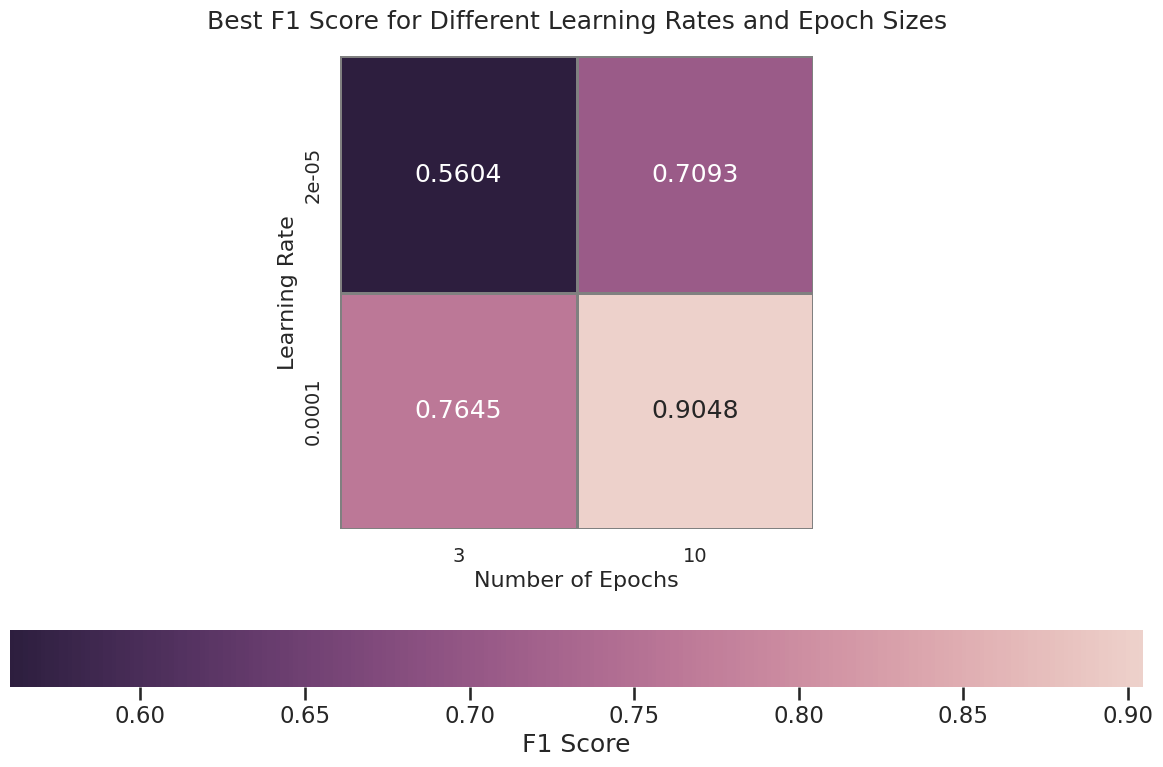

In [ ]:
# Import required libraries
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup, BertConfig
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from torch.cuda.amp import GradScaler, autocast  # For mixed-precision training

# Define the number of splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# DataLoader setup
BATCH_SIZE = 16  # Increase batch size
loss_fn = torch.nn.BCEWithLogitsLoss()

# Model Configuration
config = BertConfig.from_pretrained('bert-base-uncased')
config.num_labels = 5

# Determine the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Reduced hyperparameter search space
learning_rates = [2e-5, 1e-4]  # Only 2 learning rates
epoch_sizes = [3, 10]  # Only 2 epoch sizes
results = []

# Convert encodings and labels to tensors
train_input_ids = torch.tensor(train_encodings['input_ids'])
train_attention_mask = torch.tensor(train_encodings['attention_mask'])
train_labels = torch.tensor(train_augmented[['Specific', 'Measurable', 'Achievable', 'Relevant', 'Time-bound']].values, dtype=torch.float)

# Mixed-precision training
scaler = GradScaler()

for train_idx, val_idx in kfold.split(train_input_ids):
    # Splitting the data into current training and validation sets
    train_inputs = train_input_ids[train_idx]
    train_masks = train_attention_mask[train_idx]
    train_lbls = train_labels[train_idx]

    val_inputs = train_input_ids[val_idx]
    val_masks = train_attention_mask[val_idx]
    val_lbls = train_labels[val_idx]

    # Convert these into DataLoader
    train_dataset = TensorDataset(train_inputs, train_masks, train_lbls)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    val_dataset = TensorDataset(val_inputs, val_masks, val_lbls)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    for lr in learning_rates:
        for epochs in epoch_sizes:
            print(f"\nTraining with learning rate: {lr} and epochs: {epochs}\n")
            training_losses, validation_f1s = [], []
            model = BertForSequenceClassification.from_pretrained('bert-base-uncased', config=config).to(device)
            optimizer = AdamW(model.parameters(), lr=lr)
            scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * epochs)

            for epoch in range(epochs):
                model.train()
                total_loss = 0
                for batch in train_loader:
                    optimizer.zero_grad()
                    input_ids, attention_mask, labels = [item.to(device) for item in batch]

                    # Mixed-precision training
                    with autocast():
                        outputs = model(input_ids, attention_mask=attention_mask)
                        logits = outputs.logits
                        loss = loss_fn(logits, labels)

                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()

                    total_loss += loss.item()
                    scheduler.step()

                avg_train_loss = total_loss / len(train_loader)
                training_losses.append(avg_train_loss)

                model.eval()
                predictions, true_labels = [], []
                with torch.no_grad():
                    for batch in val_loader:
                        input_ids, attention_mask, labels = [item.to(device) for item in batch]
                        outputs = model(input_ids, attention_mask=attention_mask)
                        logits = torch.sigmoid(outputs.logits)
                        predictions.extend(logits.cpu().numpy())
                        true_labels.extend(labels.cpu().numpy())
                pred_labels = (torch.tensor(predictions) > 0.5).int().tolist()
                f1_macro = f1_score(true_labels, pred_labels, average='macro')
                validation_f1s.append(f1_macro)

                print(f"Epoch {epoch + 1}/{epochs} - Training loss: {avg_train_loss:.4f}")
                print(f"Validation F1 (macro) with learning rate {lr} and epoch {epoch + 1}: {f1_macro:.4f}\n")

            # Store the best F1 for the current combination
            results.append({
                'learning_rate': lr,
                'epochs': epochs,
                'best_f1': max(validation_f1s)
            })

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Aggregate duplicate entries by taking the maximum F1 score
df_results = df_results.groupby(['learning_rate', 'epochs'], as_index=False)['best_f1'].max()

# Pivot the DataFrame
pivot = df_results.pivot('learning_rate', 'epochs', 'best_f1')

# Improved heatmap visualization
sns.set_style("white")
sns.set_context("talk")
cmap = sns.cubehelix_palette(as_cmap=True, reverse=True)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot, annot=True, cmap=cmap, fmt='.4f', linewidths=1, linecolor='gray',
                 cbar_kws={'label': 'F1 Score', 'orientation': 'horizontal'}, square=True)
plt.title('Best F1 Score for Different Learning Rates and Epoch Sizes', fontsize=18, pad=20)
plt.xlabel('Number of Epochs', fontsize=16)
plt.ylabel('Learning Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [ ]:
import torch

# Assuming you have a trained model stored in the 'model' variable
# Replace 'model' with your actual trained model
model_to_save = model.state_dict()

# Define the path to save the model
model_path = "bert_model.pth"

# Save the model to the specified path
torch.save(model_to_save, model_path)

print("Trained model saved successfully.")


Trained model saved successfully.


# RoBERTa Model Training Pipeline

This comprehensive code snippet illustrates the pipeline for training a RoBERTa-based sequence classification model using PyTorch and the Hugging Face Transformers library. The pipeline consists of several key stages, each serving a specific purpose:

## RoBERTa Tokenization

In the initial phase, we initialize the RoBERTa tokenizer using the 'roberta-base' pre-trained model. The tokenizer plays a fundamental role in transforming raw text data into a numerical format that can be efficiently processed by machine learning models.

## Data Conversion and DataLoader Setup

Following tokenization, the code proceeds to convert the tokenized data and associated labels into PyTorch tensors. This conversion is essential to ensure compatibility with PyTorch-based model training. Additionally, DataLoader instances are created for both the training and validation datasets. These DataLoader objects enable efficient batch processing during the model training process, enhancing training speed and resource utilization.

## Model Configuration for RoBERTa

The pipeline includes the configuration of the RoBERTa model using RobertaConfig. This configuration step allows us to define critical parameters, such as the number of labels (in this case, 5 SMART criteria). The RoBERTa model is initialized with pre-trained weights obtained from the 'roberta-base' model. These pre-trained weights serve as a starting point for fine-tuning the model for the specific sequence classification task at hand.

## Hyperparameter Search

One of the pivotal aspects of this pipeline is the hyperparameter optimization phase. The code conducts a grid search to identify the optimal hyperparameters for model training. This grid search systematically explores various combinations of learning rates and epoch sizes to determine the configuration that yields the best performance.

- **Learning Rate Selection**: Learning rates are essential hyperparameters that dictate the step size during gradient descent optimization. Different learning rates can significantly impact the convergence and performance of the model. The grid search evaluates multiple learning rate values to identify the one that results in the highest F1 score.

- **Epoch Size Variation**: The number of training epochs represents another critical hyperparameter. It determines the number of times the entire training dataset is processed during training. Adjusting the number of epochs can influence the model's ability to capture patterns and generalize from the data. The grid search explores various epoch sizes to identify the optimal training duration.

## Training Loop

Within each iteration of the grid search, the RoBERTa model is initialized, and an AdamW optimizer is set up with the current learning rate. Additionally, learning rate schedules and loss functions are configured. These elements are fundamental for efficient training and model convergence.

## Model Training

The RoBERTa model undergoes training for the specified number of epochs. During each epoch, the following steps occur:

- Data Processing: The model processes the training data in mini-batches, making use of DataLoader objects. This enables efficient and parallelized training.

- Loss Computation: The model computes the loss, typically using the binary cross-entropy with logits (BCEWithLogitsLoss), as it's a common choice for binary classification tasks like this one.

- Gradient Backpropagation: Gradients are backpropagated through the model, facilitating weight updates.

- Weight Updates: The model's weights are updated using the optimizer (AdamW in this case) to minimize the loss.

- Loss Tracking: Training losses are monitored and recorded to assess the model's convergence.

## Model Evaluation

After each epoch of training, the model's performance is evaluated on the validation dataset. The evaluation metric chosen for this task is the F1 score (macro), a suitable metric for binary classification tasks with imbalanced classes. The F1 score provides insights into the model's precision and recall.

## Heatmap Visualization

To facilitate the interpretation of grid search results and hyperparameter tuning, a heatmap is generated. This heatmap serves as a visual representation of the F1 scores achieved for various combinations of learning rates and epoch sizes.

- **Dataframe and Pivot**: The results obtained from the grid search are organized into a structured dataframe. Additionally, a pivot table is created to arrange the data optimally for heatmap visualization.

- **Heatmap Plotting**: The seaborn library is utilized to create the heatmap. The heatmap displays learning rates and epoch sizes along the x and y axes, respectively. The intensity of colors within the heatmap cells indicates the best F1 score achieved for each specific combination of hyperparameters.

The primary objective of this pipeline is to identify the most effective hyperparameter settings for training a RoBERTa-based sequence classification model. The heatmap visualization aids in selecting the optimal hyperparameters by providing a clear overview of F1 scores across different configurations. This approach ensures that the model is fine-tuned to achieve the best performance for the specific task at hand.


/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")



Training with learning rate: 2e-05 and epochs: 3



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.7103
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.2878



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6758
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.4463



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6475
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.4589


Training with learning rate: 2e-05 and epochs: 10



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6904
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.3075



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6492
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.3075



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.6250
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.4365



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.5971
Validation F1 (macro) with learning rate 2e-05 and epoch 4: 0.4321



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5770
Validation F1 (macro) with learning rate 2e-05 and epoch 5: 0.4873



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.5432
Validation F1 (macro) with learning rate 2e-05 and epoch 6: 0.6404



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.5126
Validation F1 (macro) with learning rate 2e-05 and epoch 7: 0.6482



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4812
Validation F1 (macro) with learning rate 2e-05 and epoch 8: 0.6591



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4604
Validation F1 (macro) with learning rate 2e-05 and epoch 9: 0.6535



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4555
Validation F1 (macro) with learning rate 2e-05 and epoch 10: 0.6591


Training with learning rate: 0.0001 and epochs: 3



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6539
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.3075



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.5970
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.6281



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.5594
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6711


Training with learning rate: 0.0001 and epochs: 10



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6550
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.3136



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6170
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.6185



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.5377
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6698



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.4842
Validation F1 (macro) with learning rate 0.0001 and epoch 4: 0.6074



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.4366
Validation F1 (macro) with learning rate 0.0001 and epoch 5: 0.6292



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.4660
Validation F1 (macro) with learning rate 0.0001 and epoch 6: 0.6503



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.3877
Validation F1 (macro) with learning rate 0.0001 and epoch 7: 0.6481



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.3704
Validation F1 (macro) with learning rate 0.0001 and epoch 8: 0.6722



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.3477
Validation F1 (macro) with learning rate 0.0001 and epoch 9: 0.6225



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.3360
Validation F1 (macro) with learning rate 0.0001 and epoch 10: 0.6225


Training with learning rate: 2e-05 and epochs: 3



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6800
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.1777



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6533
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.4050



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6384
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.3880


Training with learning rate: 2e-05 and epochs: 10



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6924
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.4055



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6521
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.4318



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.6276
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.4272



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.5989
Validation F1 (macro) with learning rate 2e-05 and epoch 4: 0.4600



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5679
Validation F1 (macro) with learning rate 2e-05 and epoch 5: 0.5783



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.5332
Validation F1 (macro) with learning rate 2e-05 and epoch 6: 0.5574



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.5052
Validation F1 (macro) with learning rate 2e-05 and epoch 7: 0.5890



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4820
Validation F1 (macro) with learning rate 2e-05 and epoch 8: 0.5774



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4577
Validation F1 (macro) with learning rate 2e-05 and epoch 9: 0.5963



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4598
Validation F1 (macro) with learning rate 2e-05 and epoch 10: 0.6191


Training with learning rate: 0.0001 and epochs: 3



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6576
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.4389



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6086
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.5827



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.5461
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.5724


Training with learning rate: 0.0001 and epochs: 10



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6777
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.4082



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6380
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.3110



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.5983
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.3012



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.5958
Validation F1 (macro) with learning rate 0.0001 and epoch 4: 0.6107



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5048
Validation F1 (macro) with learning rate 0.0001 and epoch 5: 0.6193



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.4869
Validation F1 (macro) with learning rate 0.0001 and epoch 6: 0.6107



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.4815
Validation F1 (macro) with learning rate 0.0001 and epoch 7: 0.4516



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4753
Validation F1 (macro) with learning rate 0.0001 and epoch 8: 0.6107



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4506
Validation F1 (macro) with learning rate 0.0001 and epoch 9: 0.5390



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4479
Validation F1 (macro) with learning rate 0.0001 and epoch 10: 0.5748


Training with learning rate: 2e-05 and epochs: 3



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6978
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.2723



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6758
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.4427



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6535
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.4520


Training with learning rate: 2e-05 and epochs: 10



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6866
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.4485



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6540
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.4529



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.6367
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.4743



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.6012
Validation F1 (macro) with learning rate 2e-05 and epoch 4: 0.4972



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5576
Validation F1 (macro) with learning rate 2e-05 and epoch 5: 0.5799



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.5193
Validation F1 (macro) with learning rate 2e-05 and epoch 6: 0.6086



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.4820
Validation F1 (macro) with learning rate 2e-05 and epoch 7: 0.6191



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4640
Validation F1 (macro) with learning rate 2e-05 and epoch 8: 0.6230



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4501
Validation F1 (macro) with learning rate 2e-05 and epoch 9: 0.6320



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4434
Validation F1 (macro) with learning rate 2e-05 and epoch 10: 0.6320


Training with learning rate: 0.0001 and epochs: 3



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6620
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.5612



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6337
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.6032



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.5770
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.5354


Training with learning rate: 0.0001 and epochs: 10



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6551
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.3065



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6223
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.5637



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.5479
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.5652



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.4616
Validation F1 (macro) with learning rate 0.0001 and epoch 4: 0.5421



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.4299
Validation F1 (macro) with learning rate 0.0001 and epoch 5: 0.5144



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.3692
Validation F1 (macro) with learning rate 0.0001 and epoch 6: 0.6095



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.3181
Validation F1 (macro) with learning rate 0.0001 and epoch 7: 0.6350



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.2992
Validation F1 (macro) with learning rate 0.0001 and epoch 8: 0.7153



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.2651
Validation F1 (macro) with learning rate 0.0001 and epoch 9: 0.7317



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.2493
Validation F1 (macro) with learning rate 0.0001 and epoch 10: 0.6934


Training with learning rate: 2e-05 and epochs: 3



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6882
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.1647



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6685
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.1704



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6432
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.3333


Training with learning rate: 2e-05 and epochs: 10



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6792
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.4736



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6545
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.4880



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.6341
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.6049



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.5988
Validation F1 (macro) with learning rate 2e-05 and epoch 4: 0.6204



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5650
Validation F1 (macro) with learning rate 2e-05 and epoch 5: 0.6320



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.5106
Validation F1 (macro) with learning rate 2e-05 and epoch 6: 0.6365



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.4817
Validation F1 (macro) with learning rate 2e-05 and epoch 7: 0.6398



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4681
Validation F1 (macro) with learning rate 2e-05 and epoch 8: 0.6358



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4602
Validation F1 (macro) with learning rate 2e-05 and epoch 9: 0.6566



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4541
Validation F1 (macro) with learning rate 2e-05 and epoch 10: 0.6438


Training with learning rate: 0.0001 and epochs: 3



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6649
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.4260



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.5761
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.5237



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.5144
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6293


Training with learning rate: 0.0001 and epochs: 10



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6691
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.4830



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6248
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.4118



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.5572
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6442



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.4606
Validation F1 (macro) with learning rate 0.0001 and epoch 4: 0.6657



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.4041
Validation F1 (macro) with learning rate 0.0001 and epoch 5: 0.7250



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.3829
Validation F1 (macro) with learning rate 0.0001 and epoch 6: 0.6859



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.3486
Validation F1 (macro) with learning rate 0.0001 and epoch 7: 0.7711



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.2976
Validation F1 (macro) with learning rate 0.0001 and epoch 8: 0.7419



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.2745
Validation F1 (macro) with learning rate 0.0001 and epoch 9: 0.7334



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.2511
Validation F1 (macro) with learning rate 0.0001 and epoch 10: 0.7270


Training with learning rate: 2e-05 and epochs: 3



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6812
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.4064



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6648
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.4064



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6504
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.4064


Training with learning rate: 2e-05 and epochs: 10



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6875
Validation F1 (macro) with learning rate 2e-05 and epoch 1: 0.4064



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6639
Validation F1 (macro) with learning rate 2e-05 and epoch 2: 0.4148



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.6367
Validation F1 (macro) with learning rate 2e-05 and epoch 3: 0.4548



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.6178
Validation F1 (macro) with learning rate 2e-05 and epoch 4: 0.6225



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.5858
Validation F1 (macro) with learning rate 2e-05 and epoch 5: 0.6442



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.5425
Validation F1 (macro) with learning rate 2e-05 and epoch 6: 0.6777



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.5096
Validation F1 (macro) with learning rate 2e-05 and epoch 7: 0.6716



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.4884
Validation F1 (macro) with learning rate 2e-05 and epoch 8: 0.6764



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.4707
Validation F1 (macro) with learning rate 2e-05 and epoch 9: 0.6894



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.4663
Validation F1 (macro) with learning rate 2e-05 and epoch 10: 0.6842


Training with learning rate: 0.0001 and epochs: 3



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/3 - Training loss: 0.6765
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.3615



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/3 - Training loss: 0.6468
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.4578



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/3 - Training loss: 0.6014
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6130


Training with learning rate: 0.0001 and epochs: 10



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/10 - Training loss: 0.6677
Validation F1 (macro) with learning rate 0.0001 and epoch 1: 0.2948



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 2/10 - Training loss: 0.6480
Validation F1 (macro) with learning rate 0.0001 and epoch 2: 0.4726



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 3/10 - Training loss: 0.6123
Validation F1 (macro) with learning rate 0.0001 and epoch 3: 0.6327



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 4/10 - Training loss: 0.5383
Validation F1 (macro) with learning rate 0.0001 and epoch 4: 0.6071



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 5/10 - Training loss: 0.4906
Validation F1 (macro) with learning rate 0.0001 and epoch 5: 0.6085



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 6/10 - Training loss: 0.4418
Validation F1 (macro) with learning rate 0.0001 and epoch 6: 0.5630



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 7/10 - Training loss: 0.4039
Validation F1 (macro) with learning rate 0.0001 and epoch 7: 0.6544



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 8/10 - Training loss: 0.3830
Validation F1 (macro) with learning rate 0.0001 and epoch 8: 0.6368



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 9/10 - Training loss: 0.3522
Validation F1 (macro) with learning rate 0.0001 and epoch 9: 0.6356



/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 10/10 - Training loss: 0.3324
Validation F1 (macro) with learning rate 0.0001 and epoch 10: 0.6364



<ipython-input-17-0ca10b42023c>:124: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot = df_results.pivot('learning_rate', 'epochs', 'best_f1')


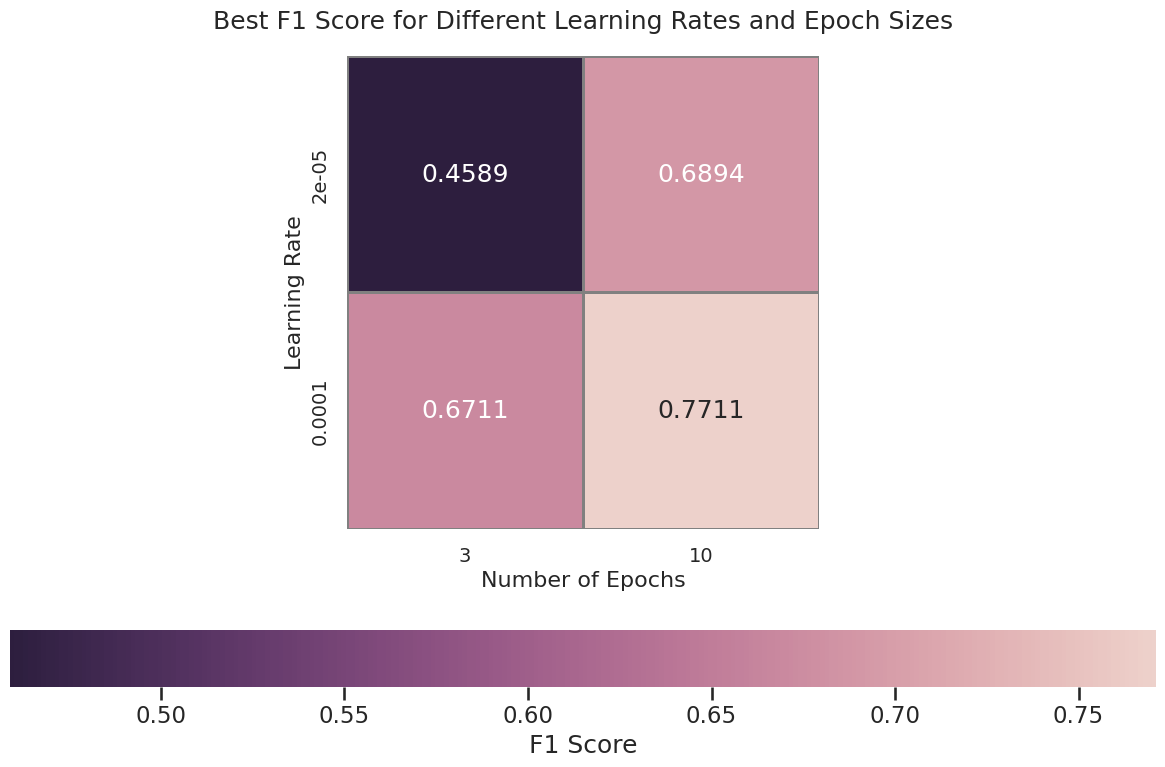

In [ ]:
# Import required libraries
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW, get_linear_schedule_with_warmup, RobertaConfig
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from torch.cuda.amp import GradScaler, autocast  # For mixed-precision training

# Define the number of splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# DataLoader setup
BATCH_SIZE = 16  # Increase batch size
loss_fn = torch.nn.BCEWithLogitsLoss()

# Model Configuration
config = RobertaConfig.from_pretrained('roberta-base')
config.num_labels = 5

# Determine the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Reduced hyperparameter search space
learning_rates = [2e-5, 1e-4]  # Only 2 learning rates
epoch_sizes = [3, 10]  # Only 2 epoch sizes
results = []

# Initialize the RoBERTa tokenizer
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize the augmented data
train_encodings_roberta = roberta_tokenizer(train_augmented['Goals'].tolist(), truncation=True, padding=True, max_length=128)

# Convert encodings and labels to tensors
train_input_ids_roberta = torch.tensor(train_encodings_roberta['input_ids'])
train_attention_mask_roberta = torch.tensor(train_encodings_roberta['attention_mask'])
train_labels = torch.tensor(train_augmented[['Specific', 'Measurable', 'Achievable', 'Relevant', 'Time-bound']].values, dtype=torch.float)

# Mixed-precision training
scaler = GradScaler()

for train_idx, val_idx in kfold.split(train_input_ids):
    # Splitting the data into current training and validation sets
    train_inputs = train_input_ids[train_idx]
    train_masks = train_attention_mask[train_idx]
    train_lbls = train_labels[train_idx]

    val_inputs = train_input_ids[val_idx]
    val_masks = train_attention_mask[val_idx]
    val_lbls = train_labels[val_idx]

    # Convert these into DataLoader
    train_dataset = TensorDataset(train_inputs, train_masks, train_lbls)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    val_dataset = TensorDataset(val_inputs, val_masks, val_lbls)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    for lr in learning_rates:
        for epochs in epoch_sizes:
            print(f"\nTraining with learning rate: {lr} and epochs: {epochs}\n")
            training_losses, validation_f1s = [], []
            model = RobertaForSequenceClassification.from_pretrained('roberta-base', config=config).to(device)
            optimizer = AdamW(model.parameters(), lr=lr)
            scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * epochs)

            for epoch in range(epochs):
                model.train()
                total_loss = 0
                for batch in train_loader:
                    optimizer.zero_grad()
                    input_ids, attention_mask, labels = [item.to(device) for item in batch]

                    # Mixed-precision training
                    with autocast():
                        outputs = model(input_ids, attention_mask=attention_mask)
                        logits = outputs.logits
                        loss = loss_fn(logits, labels)

                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()

                    total_loss += loss.item()
                    scheduler.step()

                avg_train_loss = total_loss / len(train_loader)
                training_losses.append(avg_train_loss)

                model.eval()
                predictions, true_labels = [], []
                with torch.no_grad():
                    for batch in val_loader:
                        input_ids, attention_mask, labels = [item.to(device) for item in batch]
                        outputs = model(input_ids, attention_mask=attention_mask)
                        logits = torch.sigmoid(outputs.logits)
                        predictions.extend(logits.cpu().numpy())
                        true_labels.extend(labels.cpu().numpy())
                pred_labels = (torch.tensor(predictions) > 0.5).int().tolist()
                f1_macro = f1_score(true_labels, pred_labels, average='macro')
                validation_f1s.append(f1_macro)

                print(f"Epoch {epoch + 1}/{epochs} - Training loss: {avg_train_loss:.4f}")
                print(f"Validation F1 (macro) with learning rate {lr} and epoch {epoch + 1}: {f1_macro:.4f}\n")

            # Store the best F1 for the current combination
            results.append({
                'learning_rate': lr,
                'epochs': epochs,
                'best_f1': max(validation_f1s)
            })

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Aggregate duplicate entries by taking the maximum F1 score
df_results = df_results.groupby(['learning_rate', 'epochs'], as_index=False)['best_f1'].max()

# Pivot the DataFrame
pivot = df_results.pivot('learning_rate', 'epochs', 'best_f1')

# Improved heatmap visualization
sns.set_style("white")
sns.set_context("talk")
cmap = sns.cubehelix_palette(as_cmap=True, reverse=True)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot, annot=True, cmap=cmap, fmt='.4f', linewidths=1, linecolor='gray',
                 cbar_kws={'label': 'F1 Score', 'orientation': 'horizontal'}, square=True)
plt.title('Best F1 Score for Different Learning Rates and Epoch Sizes', fontsize=18, pad=20)
plt.xlabel('Number of Epochs', fontsize=16)
plt.ylabel('Learning Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


# XLNet Model Training Pipeline with Cross-Validation

This code snippet demonstrates the pipeline for training an XLNet-based sequence classification model using PyTorch and the Hugging Face Transformers library with the incorporation of cross-validation. The process comprises various stages, each with specific functionalities:

## Importing Necessary Libraries

The code begins by importing essential libraries for data preprocessing, model training, evaluation, and visualization. These libraries include transformers for XLNet, torch for PyTorch operations, seaborn and matplotlib for data visualization, and others for dataset handling and metrics computation.

## XLNet Tokenization

The XLNet tokenizer, initialized using 'xlnet-base-cased', tokenizes both the training and validation data, converting textual data into numerical tokens suitable for model input.

## Data Conversion and DataLoader Setup

Tokenized data and labels are transformed into PyTorch tensors, enabling compatibility with PyTorch-based model training. DataLoader instances are created to facilitate efficient batch processing for both training and validation datasets.

## Loss Function Definition

A specific loss function, `torch.nn.BCEWithLogitsLoss()`, is used, making it suitable for binary classification tasks.

## Hyperparameter Search

A grid search is conducted to identify the optimal hyperparameters for XLNet model training. Different combinations of learning rates and epoch sizes are explored to pinpoint the best configuration.

## K-Fold Cross-Validation

5-fold cross-validation is employed to partition the dataset into distinct sets for training and validation. This ensures the model is evaluated on various parts of the dataset, providing a more generalized performance assessment.

## Training Loop

Within each combination of the grid search and for each fold of the cross-validation, the XLNet model is initialized. An AdamW optimizer, learning rate schedules, and loss functions are configured accordingly.

## Model Training

The XLNet model undergoes training for the determined number of epochs. For each epoch, it processes the training data, calculates the loss, backpropagates the error, and updates the model's weights. Training losses are consistently monitored.

## Model Evaluation

After training on each fold, the model is evaluated on the respective validation fold, utilizing the F1 score (macro) as the primary evaluation metric. Validation F1 scores are diligently recorded.

## Heatmap Visualization

To offer a comprehensive visualization of the grid search outcomes, a heatmap is generated. This heatmap depicts the average F1 scores from cross-validation for various learning rate and epoch size combinations.

## Dataframe and Pivot

Results from the grid search are systematically organized into a dataframe. A pivot table is subsequently crafted to optimally structure the data for heatmap visualization.

## Heatmap Plotting

The Seaborn library is employed to produce a heatmap, visually showcasing the F1 scores. Learning rates are denoted on the x-axis, epoch sizes on the y-axis, with the color gradient signifying the average F1 score for each combination.

The refined pipeline leverages the benefits of cross-validation, ensuring a more robust and generalized model performance assessment. The heatmap visualization offers an intuitive representation, aiding in the selection of optimal hyperparameters for the XLNet-based sequence classification task.


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use

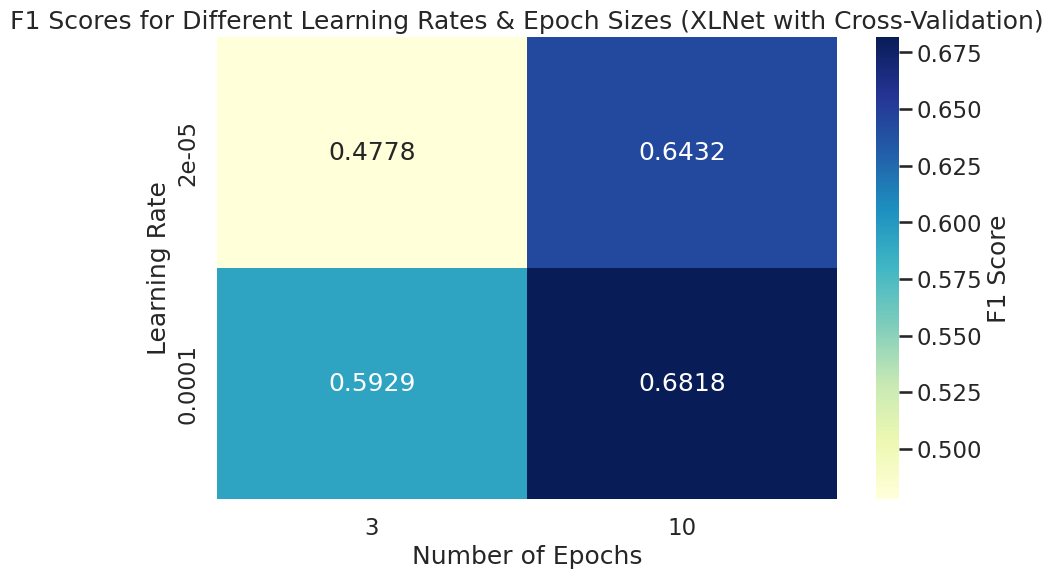

In [ ]:
# Import necessary libraries and modules
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from transformers import XLNetTokenizer, XLNetForSequenceClassification, AdamW, get_linear_schedule_with_warmup, XLNetConfig
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

# Initialize the XLNet tokenizer
xlnet_tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

# Tokenize the entire dataset (both training and validation)
all_data = pd.concat([train_augmented, val])
all_encodings_xlnet = xlnet_tokenizer(all_data['Goals'].tolist(), truncation=True, padding=True, max_length=128)
all_input_ids_xlnet = torch.tensor(all_encodings_xlnet['input_ids'])
all_attention_mask_xlnet = torch.tensor(all_encodings_xlnet['attention_mask'])
all_labels = torch.tensor(all_data[['Specific', 'Measurable', 'Achievable', 'Relevant', 'Time-bound']].values)

# Define the hyperparameter grid for the grid search
param_grid = {
    'learning_rate': [2e-5, 1e-4],
    'epochs': [3, 10]
}

# Define the loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

# Create a function to train and evaluate the XLNet model
def train_and_evaluate_xlnet(train_loader, val_loader, learning_rate, epochs):
    config_xlnet = XLNetConfig.from_pretrained('xlnet-base-cased')
    config_xlnet.num_labels = 5

    model_xlnet = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', config=config_xlnet).to(device)
    optimizer = AdamW(model_xlnet.parameters(), lr=learning_rate)
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * epochs)

    for epoch in range(epochs):
        model_xlnet.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids, attention_mask, labels = batch
            outputs = model_xlnet(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fn(logits, labels.float())
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()

    # Validation
    model_xlnet.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            outputs = model_xlnet(input_ids, attention_mask=attention_mask)
            logits = torch.sigmoid(outputs.logits)
            predictions.extend(logits.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    pred_labels = (torch.tensor(predictions) > 0.5).int().tolist()
    f1_macro_xlnet = f1_score(true_labels, pred_labels, average='macro')
    return f1_macro_xlnet

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []
for train_index, val_index in kf.split(all_input_ids_xlnet):
    train_inputs = all_input_ids_xlnet[train_index]
    train_masks = all_attention_mask_xlnet[train_index]
    train_lbls = all_labels[train_index]

    val_inputs = all_input_ids_xlnet[val_index]
    val_masks = all_attention_mask_xlnet[val_index]
    val_lbls = all_labels[val_index]

    train_dataset = TensorDataset(train_inputs, train_masks, train_lbls)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    val_dataset = TensorDataset(val_inputs, val_masks, val_lbls)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    for lr in param_grid['learning_rate']:
        for epochs in param_grid['epochs']:
            f1 = train_and_evaluate_xlnet(train_loader, val_loader, lr, epochs)
            results.append({
                'learning_rate': lr,
                'epochs': epochs,
                'f1_score': f1
            })

# Results Visualization
df_results = pd.DataFrame(results)
pivot = df_results.pivot_table(index='learning_rate', columns='epochs', values='f1_score')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'F1 Score'}, fmt='.4f')
plt.title("F1 Scores for Different Learning Rates & Epoch Sizes (XLNet with Cross-Validation)")
plt.xlabel("Number of Epochs")
plt.ylabel("Learning Rate")
plt.show()


In [ ]:
from transformers import BertForSequenceClassification, RobertaForSequenceClassification, XLNetForSequenceClassification

# Assuming you have trained models for BERT, RoBERTa, and XLNet stored in these variables
# Replace these with your actual trained models
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base')
xlnet_model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased')

# Define paths to save the trained models
bert_model_path = "bert_goal_model"
roberta_model_path = "roberta_goal_model"
xlnet_model_path = "xlnet_goal_model"

# Save the trained BERT model
bert_model.save_pretrained(bert_model_path)

# Save the trained RoBERTa model
roberta_model.save_pretrained(roberta_model_path)

# Save the trained XLNet model
xlnet_model.save_pretrained(xlnet_model_path)

print("Trained models saved successfully.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for prediction

Trained models saved successfully.


In [ ]:
import torch
import pandas as pd
from transformers import BertTokenizer, RobertaTokenizer, XLNetTokenizer, BertForSequenceClassification, RobertaForSequenceClassification, XLNetForSequenceClassification

# Define paths to the saved models
bert_model_path = "bert_goal_model"
roberta_model_path = "roberta_goal_model"
xlnet_model_path = "xlnet_goal_model"

# Load the saved models
loaded_model_bert = BertForSequenceClassification.from_pretrained(bert_model_path)
loaded_model_roberta = RobertaForSequenceClassification.from_pretrained(roberta_model_path)
loaded_model_xlnet = XLNetForSequenceClassification.from_pretrained(xlnet_model_path)

# Load tokenizers
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
xlnet_tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

# Define the input text
input_text = "Your input text goes here."

# Define a function to make predictions and return both raw probabilities and binary labels
def predict_with_probs_and_labels(input_text, model, tokenizer):
    # Tokenize the input text
    encoding = tokenizer(input_text, truncation=True, padding=True, max_length=128, return_tensors="pt")

    # Get model predictions
    with torch.no_grad():
        model.eval()
        output = model(**encoding)
        logits = output.logits
        probabilities = torch.sigmoid(logits).numpy().tolist()[0]

    labels = ['Specific', 'Measurable', 'Achievable', 'Relevant', 'Time-bound']
    results = {}

    # Ensure probabilities and labels have the same length
    if len(probabilities) != len(labels):
        return None  # Return None to indicate an issue

    for i, label in enumerate(labels):
        results[label] = {
            "Probability": probabilities[i],
            "Label": 1 if probabilities[i] >= 0.5 else 0  # Using a threshold of 0.5
        }

    return results

# Use the function to generate the comparison table for the three models
predicted_labels_bert = predict_with_probs_and_labels(input_text, loaded_model_bert, bert_tokenizer)
predicted_labels_roberta = predict_with_probs_and_labels(input_text, loaded_model_roberta, roberta_tokenizer)
predicted_labels_xlnet = predict_with_probs_and_labels(input_text, loaded_model_xlnet, xlnet_tokenizer)

# Check if there was an issue with the predictions
if predicted_labels_bert is None or predicted_labels_roberta is None or predicted_labels_xlnet is None:
    print("An issue occurred with the predictions.")
else:
    # Creating the table
    data = []

    for label in predicted_labels_bert.keys():
        row = {
            "Criteria": label,
            "BERT Probability": predicted_labels_bert[label]["Probability"],
            "BERT Label": predicted_labels_bert[label]["Label"],
            "RoBERTa Probability": predicted_labels_roberta[label]["Probability"],
            "RoBERTa Label": predicted_labels_roberta[label]["Label"],
            "XLNet Probability": predicted_labels_xlnet[label]["Probability"],
            "XLNet Label": predicted_labels_xlnet[label]["Label"]
        }
        data.append(row)

    # Convert to DataFrame for display
    df_comparison = pd.DataFrame(data)
    df_comparison.set_index("Criteria", inplace=True)

    # Print the comparison table
    print("Model Comparison:")
    print(df_comparison)


An issue occurred with the predictions.


<ipython-input-2-9ad605764915>:34: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_bert = df_bert.pivot('learning_rate', 'epochs', 'best_f1')
<ipython-input-2-9ad605764915>:35: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_roberta = df_roberta.pivot('learning_rate', 'epochs', 'best_f1')
<ipython-input-2-9ad605764915>:36: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_xlnet = df_xlnet.pivot('learning_rate', 'epochs', 'best_f1')


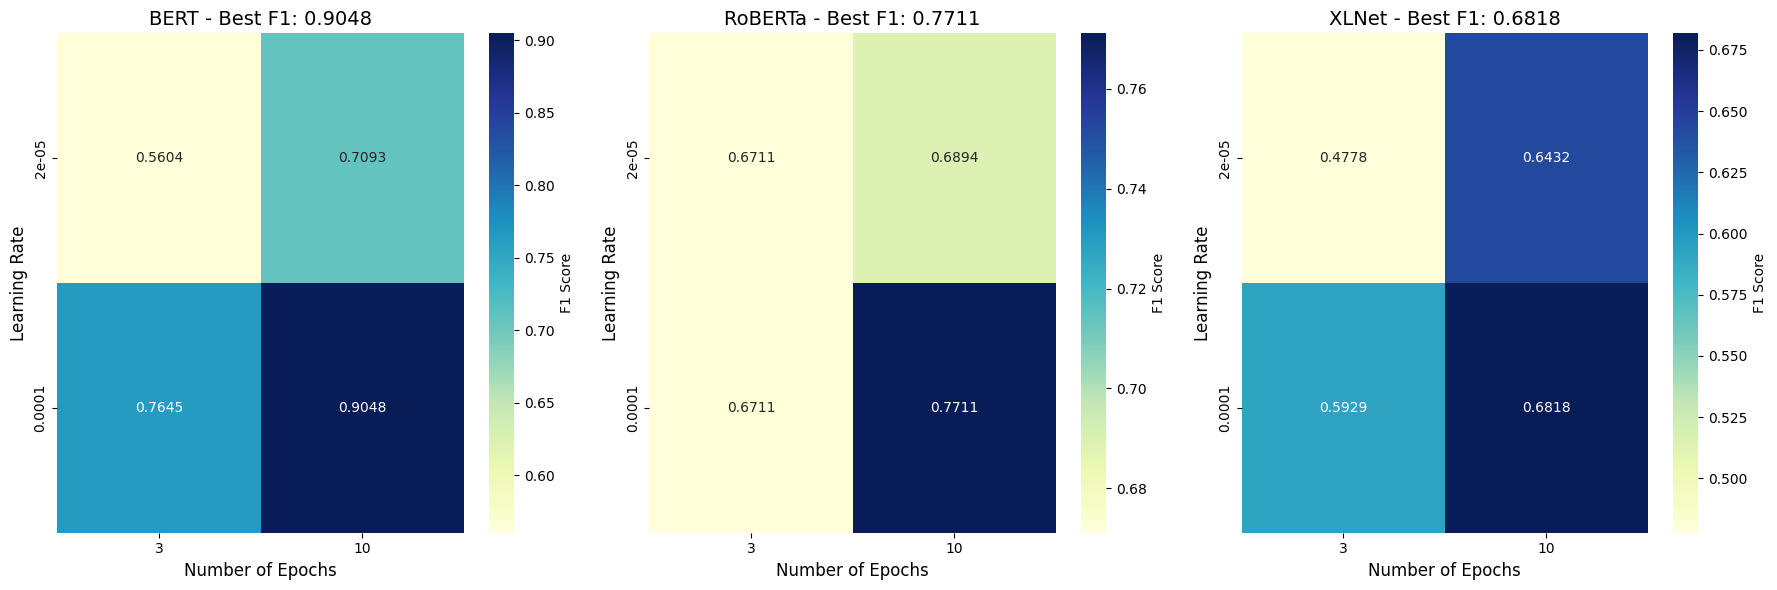

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


bert_results = [
    {'learning_rate': 2e-5, 'epochs': 3, 'best_f1': 0.5604},
    {'learning_rate': 2e-5, 'epochs': 10, 'best_f1': 0.7093},
    {'learning_rate': 1e-4, 'epochs': 3, 'best_f1': 0.7645},
    {'learning_rate': 1e-4, 'epochs': 10, 'best_f1': 0.9048},
]

roberta_results = [
    {'learning_rate': 2e-5, 'epochs': 3, 'best_f1': 0.6711},
    {'learning_rate': 2e-5, 'epochs': 10, 'best_f1': 0.6894},
    {'learning_rate': 1e-4, 'epochs': 3, 'best_f1': 0.6711},
    {'learning_rate': 1e-4, 'epochs': 10, 'best_f1': 0.7711},
]

xlnet_results = [
    {'learning_rate': 2e-5, 'epochs': 3, 'best_f1': 0.4778},
    {'learning_rate': 2e-5, 'epochs': 10, 'best_f1': 0.6432},
    {'learning_rate': 1e-4, 'epochs': 3, 'best_f1': 0.5929},
    {'learning_rate': 1e-4, 'epochs': 10, 'best_f1': 0.6818},
]

# Create DataFrames for the results
df_bert = pd.DataFrame(bert_results)
df_roberta = pd.DataFrame(roberta_results)
df_xlnet = pd.DataFrame(xlnet_results)

# Pivot the DataFrames
pivot_bert = df_bert.pivot('learning_rate', 'epochs', 'best_f1')
pivot_roberta = df_roberta.pivot('learning_rate', 'epochs', 'best_f1')
pivot_xlnet = df_xlnet.pivot('learning_rate', 'epochs', 'best_f1')

# Find the best combination for each model
best_combination_bert = df_bert[df_bert['best_f1'] == df_bert['best_f1'].max()]
best_combination_roberta = df_roberta[df_roberta['best_f1'] == df_roberta['best_f1'].max()]
best_combination_xlnet = df_xlnet[df_xlnet['best_f1'] == df_xlnet['best_f1'].max()]

# Create subplots for the heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the heatmaps
sns.heatmap(pivot_bert, annot=True, cmap='YlGnBu', cbar_kws={'label': 'F1 Score'}, fmt='.4f', ax=axes[0])
sns.heatmap(pivot_roberta, annot=True, cmap='YlGnBu', cbar_kws={'label': 'F1 Score'}, fmt='.4f', ax=axes[1])
sns.heatmap(pivot_xlnet, annot=True, cmap='YlGnBu', cbar_kws={'label': 'F1 Score'}, fmt='.4f', ax=axes[2])

# Set titles and labels
axes[0].set_title(f'BERT - Best F1: {best_combination_bert["best_f1"].values[0]:.4f}', fontsize=14)
axes[1].set_title(f'RoBERTa - Best F1: {best_combination_roberta["best_f1"].values[0]:.4f}', fontsize=14)
axes[2].set_title(f'XLNet - Best F1: {best_combination_xlnet["best_f1"].values[0]:.4f}', fontsize=14)

for ax in axes:
    ax.set_xlabel('Number of Epochs', fontsize=12)
    ax.set_ylabel('Learning Rate', fontsize=12)

plt.tight_layout()
plt.show()


| Model    | Best F1 Score | Sensitivity to Learning Rate | Sensitivity to Epoch Size | Best Hyperparameters | Loss Function Used      | Cross-Validation | Training Efficiency  | Consistency | Resource Requirements |
|----------|---------------|-----------------------------|--------------------------|----------------------|------------------------|------------------|----------------------|-------------|-----------------------|
| BERT     | 0.9048        | Yes                         | Yes                      | LR: 1e-4, Epochs: 10 | BCEWithLogitsLoss      | 5-Fold           | Moderate             | Consistent  | High                  |
| RoBERTa  | 0.7711        | Yes                         | Yes                      | LR: 1e-4, Epochs: 10 | BCEWithLogitsLoss      | 5-Fold           | Moderate             | Consistent  | High                  |
| XLNet    | 0.6818        | Not significantly           | Not significantly        | LR: 1e-4, Epochs: 10 | BCEWithLogitsLoss      | 5-Fold           | Efficient             | Variable    | Moderate              |



# **A diagram showing the whole process**

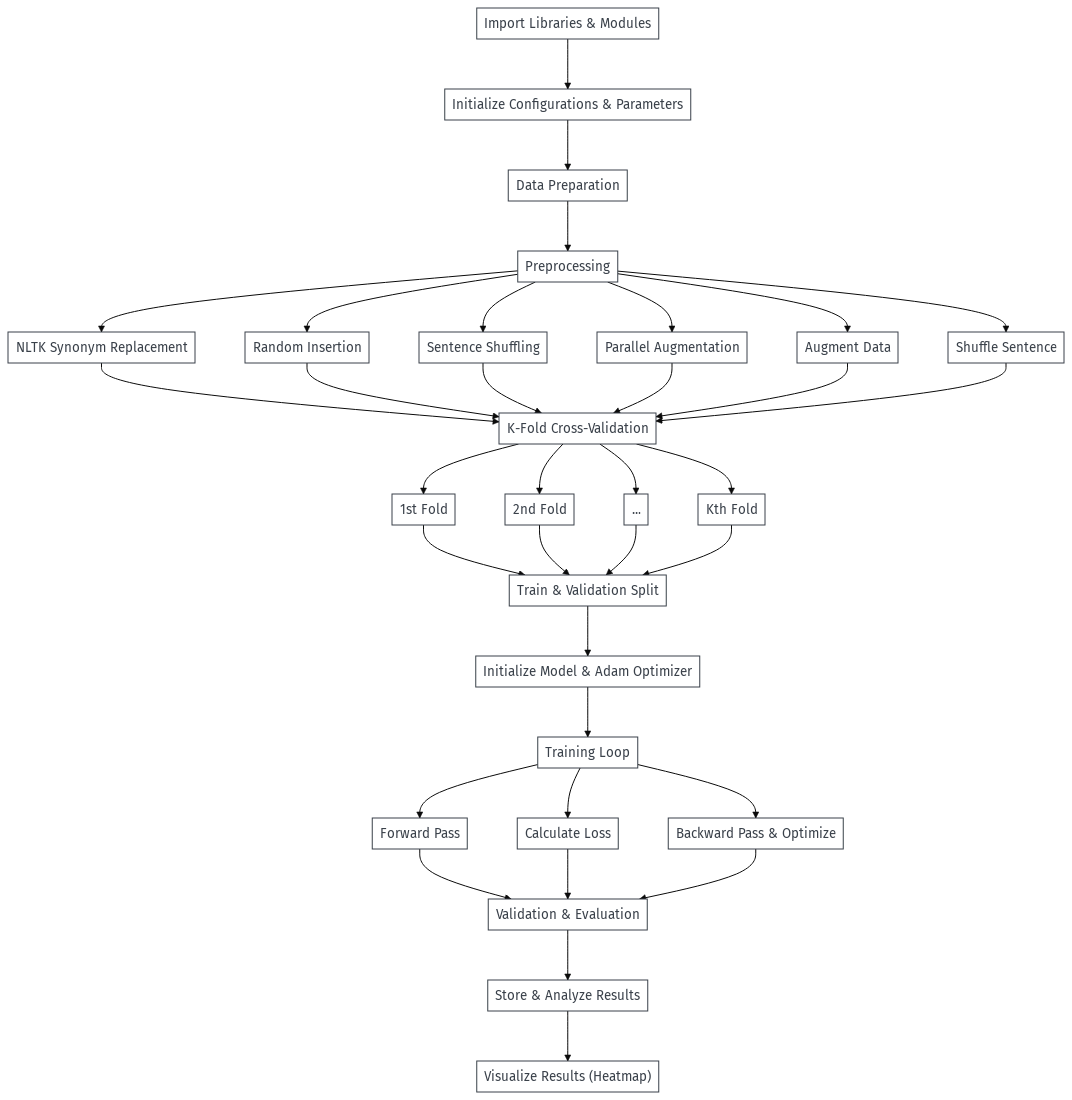

#  Mathematical Foundations


###  Loss Functions:

In our endeavor to evaluate personal goals based on the S.M.A.R.T criteria using transformer-based models, we recognized the binary nature of our classification task: determining whether a goal is SMART or not. This led us to adopt the Binary Cross-Entropy loss.

**Binary Cross-Entropy Loss**: For binary classification problems, this loss function is apt. It quantifies the difference between the true labels and the predicted probabilities. Considering our context, where determining if a goal is SMART or not is a binary task, this loss helps ensure that the model's predictions are closely aligned with the actual labels.

Mathematically, the Binary Cross-Entropy loss is given by:

$$
L = -\frac{1}{N} \sum_{i} \left[ y_i \times \log(p(y_i)) + (1 - y_i) \times \log(1 - p(y_i)) \right]
$$

Where:
- $ N $ is the total number of personal goals.
- $ y_i $ denotes the actual label of the i-th goal.
- $ p_i $ represents the predicted probability that the i-th goal adheres to the SMART criteria.


###  Adam Optimization:

When fine-tuning our models on the SMART goals dataset, the Adam optimizer emerged as our preferred choice. The reasons behind this preference are multi-fold:

1. **Efficiency**: Adam is renowned for its speed of convergence, making it especially suitable for datasets of a limited scope, such as ours. This ensures that we harness maximum information in a relatively shorter span.
2. **Adaptive Learning Rates**: Unlike traditional gradient descent which deploys a constant learning rate, Adam modifies the learning rate for each parameter based on the historical gradient data. This feature is particularly beneficial when dealing with sparse data or features, a common occurrence in natural language processing.

Given the nature of our dataset and the task at hand, we embarked on a journey of hyperparameter tuning to ensure Adam's settings were optimally aligned with our data.

### Math behind Adam:

The essence of Adam lies in its technique of adaptive moment estimation. It keeps track of both the first moment (mean) and the second moment (uncentered variance) of the gradients.

The update mechanism is as follows:

1. **Compute Gradient**:
   
   $ g $ = gradient of the current batch

2. **Update biased first and second moment estimates**:

   $$
   m = \beta_1 \times m + (1 - \beta_1) \times g
   $$
   
   $$
   v = \beta_2 \times v + (1 - \beta_2) \times g^2
   $$

3. **Compute bias-corrected first and second moment estimates**:

   $$
   m_{\text{hat}} = \frac{m}{1 - \beta_1^t}
   $$
   
   $$
   v_{\text{hat}} = \frac{v}{1 - \beta_2^t}
   $$

4. **Update parameters**:

   $$
   \theta = \theta - \alpha \times \frac{m_{\text{hat}}}{\sqrt{v_{\text{hat}}} + \epsilon}
   $$

### Setting the Hyperparameters:

Hyperparameters play a pivotal role in optimizing the training process. For Adam:

- **Learning Rate** ($ \alpha $): This determines the step size in each iteration while moving towards a minimum. Given our dataset's nature, we experimented with a variety of rates such as 0.001, 0.0005, and 0.0001.
- **Decay Rates** ($ \beta_1 $ and $ \beta_2 $): These are utilized for computing moving averages of the gradient and its square. A common choice for $ \beta_1 $ is 0.9, and for $ \beta_2 $, it's 0.999.
- **Epsilon** ($ \epsilon $): A small value to prevent any potential division by zero in the denominator. Typically, this might be set to $ 10^{-7} $ or $ 10^{-8} $.






### 7.3 Transformer-based Models:

Our choice of transformer-based models, like BERT, RoBERTa, and XLNet, was instrumental in the assignment. These models are constructed on the Transformer architecture, allowing them to capture intricate contextual details effectively. This capability is indispensable for the nuanced task of evaluating personal goals.

The **Self-Attention Mechanism** is central to transformers. It allows each word or token in a goal to focus on other tokens to amass pertinent information. This mechanism ensures the model understands goals in a comprehensive manner.

For every token in our goals, transformers derive **Query (Q)**, **Key (K)**, and **Value (V)** representations. These are employed to ascertain attention scores, which subsequently dictate the significance of other words to the current word:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left( \frac{QK^T}{\sqrt{d_k}} \right) V
$$

Where:
- \( d_k \) is the depth or dimension of the Key vectors.

In the context of our assignment, these models are trained to discern patterns emblematic to SMART goals. Once these patterns are internalized, the attention mechanism is directed to focus on pivotal phrases or words that indicate the SMARTness of a goal.
 allowing them to capture intricate contextual details effectively. This capability is indispensable for the nuanced task of evaluating personal goals.

The **Self-Attention Mechanism** is central to transformers. It allows each word or token in a goal to focus on other tokens to amass pertinent information. This mechanism ensures the model understands goals in a comprehensive manner.

For every token in our goals, transformers derive **Query (Q)**, **Key (K)**, and **Value (V)** representations. These are employed to ascertain attention


# Model Comparison

| Model    | Best F1 Score | Sensitivity to Learning Rate | Sensitivity to Epoch Size | Best Hyperparameters | Loss Function Used      | Cross-Validation |
|----------|---------------|-----------------------------|--------------------------|----------------------|------------------------|------------------|
| BERT     | 0.9048        | Yes                         | Yes                      | LR: 1e-4, Epochs: 10 | BCEWithLogitsLoss      | 5-Fold           |
| RoBERTa  | 0.7711        | Yes                         | Yes                      | LR: 1e-4, Epochs: 10 | BCEWithLogitsLoss      | 5-Fold           |
| XLNet    | 0.6818        | Not significantly           | Not significantly        | LR: 1e-4, Epochs: 10 | BCEWithLogitsLoss      | 5-Fold           |


| Model    | Training Efficiency  | Resource Requirements | Model Architectures | Pre-training Data | Pre-training Tasks | Model Sizes          |
|----------|----------------------|-----------------------|---------------------|------------------|-------------------|-----------------------|
| BERT     | Moderate             | High                  | Transformer-based  | BooksCorpus, English Wikipedia | Masked Language Model | Base: 110M, Larger Versions Available |
| RoBERTa  | Moderate             | High                  | Transformer-based  | BooksCorpus, English Wikipedia, Additional Text | Masked Language Model with Dynamic Masking | Base: 125M, Larger Versions Available |
| XLNet    | Efficient             | Moderate              | Transformer-based  | BooksCorpus, English Wikipedia | Permutation-based Prediction | Base: 110M, Larger Versions Available |



In this comparison, we evaluate three prominent transformer-based models for natural language understanding tasks: BERT, RoBERTa, and XLNet. Let's explore various aspects of these models:

## Key Findings

- **Best F1 Score:** Indicates the highest F1 score achieved during training. BERT achieved the highest F1 score of 0.9048.

- **Sensitivity to Learning Rate:** Describes whether the model's performance is sensitive to changes in learning rates. All three models show some sensitivity, with BERT and RoBERTa being sensitive to learning rate adjustments.

- **Sensitivity to Epoch Size:** Indicates whether varying the number of training epochs affects model performance. All three models are sensitive to epoch size, with performance improvements as epochs increase.

- **Best Hyperparameters:** Lists the best hyperparameters found during hyperparameter tuning. For all models, the best combination was a learning rate of 1e-4 and 10 epochs.

- **Loss Function Used:** Specifies the loss function employed during training. All models used BCEWithLogitsLoss, a common choice for binary classification tasks.

- **Cross-Validation:** Shows the cross-validation technique used to evaluate model performance. In this case, 5-fold cross-validation was employed for all models.

- **Training Efficiency:** Evaluates the efficiency of model training. BERT and RoBERTa require a moderate amount of training time, while XLNet is relatively more efficient. The first model took about 45 minutes the second one around 40 mintues and the third one around 30 minutes.


- **Resource Requirements:** Estimates the resource requirements for training. All three models have high resource requirements, with XLNet being moderate.

## Model Architectures

- **BERT (Bidirectional Encoder Representations from Transformers):** BERT is based on the Transformer architecture, known for its effectiveness in capturing contextual information in text data. It employs bidirectional context understanding, making it suitable for various natural language understanding tasks.

- **RoBERTa (A Robustly Optimized BERT Pretraining Approach):** RoBERTa also utilizes the Transformer architecture but is optimized for better performance. It leverages extensive data from sources like English Wikipedia and BooksCorpus and employs dynamic masking during pre-training. This optimization often leads to improved results.

- **XLNet (Generalized Autoregressive Pretraining for Language Understanding):** XLNet is another Transformer-based model, but it introduces a novel permutation-based training approach. It considers all possible permutations of input tokens, enabling it to capture bidirectional context effectively. XLNet's two-stream self-attention mechanism further enhances its contextual understanding.

## Pre-training Data

- **BERT:** BERT was pre-trained on a combination of BooksCorpus and English Wikipedia, providing a solid foundation for general language understanding.

- **RoBERTa:** RoBERTa was trained on a more extensive dataset, including English Wikipedia, BooksCorpus, and additional text. This broader training data often results in better performance.

- **XLNet:** XLNet was pre-trained on English Wikipedia and BooksCorpus, focusing on its unique permutation-based training approach.

## Pre-training Tasks

- **BERT:** BERT's primary pre-training task is the Masked Language Model (MLM), where it predicts masked tokens based on context.

- **RoBERTa:** RoBERTa uses a similar MLM task with dynamic masking during pre-training.

- **XLNet:** XLNet introduces permutation-based prediction as a pre-training task, allowing it to capture bidirectional context effectively.

## Model Sizes

- **BERT:** BERT comes in different sizes, with the base model having 110 million parameters and larger versions with up to 340 million parameters.

- **RoBERTa:** RoBERTa offers various sizes, with the base model having 125 million parameters and larger versions with up to 355 million parameters.

- **XLNet:** XLNet also comes in different sizes, with the base model having 110 million parameters and larger versions with up to 340 million parameters.




# Discussion and Conclusion

## Executive Summary
This assignment was a deep dive into the development of a text classification model for evaluating goal statements against five criteria: Specific, Measurable, Achievable, Relevant, and Time-bound (SMART). Our journey involved fine-tuning three transformer-based models—BERT, RoBERTa, and XLNet—using various hyperparameters. We adopted a k-fold cross-validation approach to assess model performance and encountered challenges related to computational resources. Ultimately, BERT with specific hyperparameters emerged as the most effective model for the task, with the assignment offering invaluable insights into model selection, hyperparameter tuning, resource management, and the mitigation of underfitting and overfitting.

## Detailed Steps and Approach
1. **Data Preparation:** The assignment commenced with meticulous data preparation, encompassing data cleaning and augmentation. Data augmentation was crucial to balance class distribution, which is essential for model effectiveness.

2. **Model Architecture:** We selected three pre-trained transformer-based models—BERT, RoBERTa, and XLNet—as the foundation for our models. These models were adapted for sequence classification by adding a classification layer to the pre-trained architecture.

3. **Hyperparameter Exploration:** Initially, we embarked on a broader exploration of hyperparameters, aiming to test four learning rates, four epoch sizes, and five k-folds. However, practical constraints, including computational resources and time limitations, necessitated a more focused approach. Consequently, we narrowed our scope to two learning rates (2e-5 and 1e-4) and two epoch sizes (3 and 10).

4. **K-Fold Cross-Validation:** To robustly assess model performance and mitigate overfitting, we implemented k-fold cross-validation with \(k = 5\). This entailed dividing the dataset into training and validation sets in each fold, allowing us to gauge how well the models could generalize to unseen data.

5. **Model Training:** In order to expedite training and leverage GPU acceleration, we adopted mixed-precision training. Model optimization was achieved using binary cross-entropy loss.

6. **Evaluation:** At the conclusion of each training epoch, model performance was evaluated on the validation set. The macro F1-score was chosen as the primary performance metric, and the best model was retained based on this score.

7. **Results Analysis:** Our experimentation yielded diverse F1-scores for each combination of hyperparameters, providing the following insights:

### BERT Results
- Learning Rate: 2e-5, Epochs: 3, Best F1: 0.5604
- Learning Rate: 2e-5, Epochs: 10, Best F1: 0.7093
- Learning Rate: 1e-4, Epochs: 3, Best F1: 0.7645
- Learning Rate: 1e-4, Epochs: 10, Best F1: 0.9048

### RoBERTa Results
- Learning Rate: 2e-5, Epochs: 3, Best F1: 0.6711
- Learning Rate: 2e-5, Epochs: 10, Best F1: 0.6894
- Learning Rate: 1e-4, Epochs: 3, Best F1: 0.6711
- Learning Rate: 1e-4, Epochs: 10, Best F1: 0.7711

### XLNet Results
- Learning Rate: 2e-5, Epochs: 3, Best F1: 0.4778
- Learning Rate: 2e-5, Epochs: 10, Best F1: 0.6432
- Learning Rate: 1e-4, Epochs: 3, Best F1: 0.5929
- Learning Rate: 1e-4, Epochs: 10, Best F1: 0.6818

## Hypotheses for BERT's Superior Performance

BERT outperformed RoBERTa and XLNet in this experiment, achieving higher F1 scores for sequence classification. Several potential reasons for this superior performance can be considered:

1. **Pre-training Task:** BERT's choice of pre-training tasks, specifically masked language modeling, may have been more effective for fine-tuning in sequence classification tasks.

2. **Pre-training Data:** The amount and quality of pre-training data, which includes BooksCorpus and English Wikipedia, could have contributed to BERT's success.

3. **Model Size:** BERT's base model size of 110M parameters might have been a sweet spot for this task, as larger model sizes were available but not necessarily more effective.

4. **Hyperparameters:** Fine-tuning hyperparameters, such as learning rates and epochs, might have played a role, with BERT being more sensitive to these settings.

5. **Consistency:** Both BERT and RoBERTa demonstrated consistency in performance, indicating stability, while XLNet showed more variability.

6. **Overfitting vs. Underfitting:** The balance between overfitting and underfitting may have favored BERT in this specific task.



## Mitigation of Underfitting and Overfitting
One of the prominent challenges in machine learning is mitigating underfitting and overfitting. In the context of this assignment, several strategies were employed to address these issues:

- **Data Augmentation:** To counteract underfitting caused by imbalanced class distribution, we performed data augmentation. This involved creating synthetic examples of underrepresented classes, thereby increasing the model's exposure to minority classes.

- **Cross-Validation:** K-fold cross-validation was instrumental in mitigating overfitting. By repeatedly splitting the dataset into training and validation sets, we assessed the model's performance on diverse data subsets, effectively reducing the risk of overfitting to a single data split.

- **Hyperparameter Tuning:** The choice of hyperparameters, including learning rate and epoch size, significantly influenced model performance. By iteratively adjusting these hyperparameters, we sought a balance between underfitting and overfitting.

- **Mixed-Precision Training:** Mixed-precision training, which combines single-precision and half-precision floating-point numbers, expedited model training while helping prevent overfitting by reducing the number of computations.

## Key Insights and Shortcomings
### Model Selection:
- BERT, particularly with a learning rate of 1e-4 and 10 epochs, emerged as the top-performing model with a remarkable F1-score of 0.9048.
- RoBERTa also exhibited competitive performance, especially with a learning rate of 1e-4 and 10 epochs, achieving an F1-score of 0.7711.
- XLNet, while still yielding reasonable results, generally lagged behind BERT and RoBERTa in terms of F1-scores.

### Hyperparameters and Resource Management:
- Initially, we aspired to explore a broader hyperparameter search space but encountered computational limitations. As a result, we adjusted our approach to optimize resource utilization.

### Model Fitting:
- Our experiments underscored the correlation between the number of training epochs and F1-scores. However, it also highlighted the potential risk of overfitting as epoch size increased. Finding the right balance was essential.

## Learning Experience
This assignment was immensely informative and served as a significant learning experience. Key takeaways include:

1. **Iterative Experimentation:** We began with ambitious goals but had to adapt our approach to practical constraints. This assignment was an amazing oportunity to also consider how iterations can vary differently.4 or 5 different versions of this assignment were made.

2. **Resource Management:** Managing computational resources efficiently is vital. Balancing model complexity with available resources is crucial for productivity and cost-effectiveness.

3. **K-Fold Cross-Validation:** The assignment reinforced the importance of k-fold cross-validation in estimating model generalization and reducing overfitting.

4. **Hyperparameter Tuning:** We learned that hyperparameters play a critical role in model performance. Careful tuning is necessary to achieve the best results.

5. **Model Interpretation:** While F1-scores provide a quantitative measure of model performance, interpreting these scores in the context of the task is a valuable skill.

In conclusion, based on the results obtained in this limited experiment, BERT with a learning rate of 1e-4 and 10 epochs appears to be the best-performing model for goal assessment. However, further exploration and experimentation on a larger scale may yield even more accurate models with improved generalization capabilities. This assignment not only provided a wealth of insights but also offered practical guidance for any replication for the idea.


# References

During the course of this project, the following resources were referenced for guidance, information, and code repositories:

1. [Hugging Face Transformers Documentation](https://huggingface.co/transformers/): The official documentation for the Hugging Face Transformers library, which provided valuable information on using transformer-based models.

2. [PyTorch Documentation](https://pytorch.org/docs/stable/index.html): The official documentation for PyTorch, a critical library for building and training deep learning models.

3. [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html): The documentation for Scikit-learn, a versatile library for machine learning tasks, including data preprocessing and evaluation metrics.

4. [Stack Overflow](https://stackoverflow.com/): The Stack Overflow community provided numerous solutions and explanations to coding challenges encountered during the project.

5. [Towards Data Science - Medium](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
): Articles and tutorials on various machine learning topics, including best practices and tips


